# Pointing Experiment

### Introduction
In this study, a novel technique for mouse interaction will be evaluated. We conducted an experiment where participants had to complete pointing tasks under two different conditions: once with support of our pointing technique, and once again without any additional support.

### Independent Variable: 
            - target shape (circle, square)
            - support technique (on, off)
     
### Dependent Variable:
            - accuracy (by number of clicks)
            - time per task
         
### Hypotheses:
            1) Target shape causes a difference in time per task

            2) Use of the support technique causes a difference in time per task

            3) Target shape causes a difference in accuracy

            4) Use of the support technique causes a difference accuracy

### Participants:
The experiment was performed on two subjects. Due to the pandemic situation, it is not that easy to recruit study participants. Since it is necessary to run a Python program on a Linux machine for the trial, we decided to test ourselves.
As a result, one man and one woman were tested each. The average age of the test subjects is 28 years. Both test subjects are master students of media informatics at the University of Regensburg.
Due to technical reasons, both test subjects performed the experiment three times each.

### Novel technique:
In order to improve the correct clicking with the mouse on a predefined object, the mouse is attracted to the object by a kind of magnetic attraction: 
The pointing technique takes the current position of the user's cursor and looks for the nearest valid target. Should the cursor be within a certain distance to the target, it will be pulled closer towards it.

In [1]:
# imports
import pandas as pd # data mangling
import matplotlib
from matplotlib import pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [20]:
df_pointing_exp = pd.read_csv('experiment_concat.csv')

In [21]:
display (df_pointing_exp)

,user_id,timestamp,condition,num_clicks,time_taken_in_ms,click_x,click_y,target_width,num_shapes,screen_width,screen_height,helper_enabled
0,1,2021-05-10 19:24:46.127606,Circle,1,570,1136,311,40,199,1280,720,True
1,1,2021-05-10 19:24:46.906867,Circle,1,771,1012,397,40,208,1280,720,True
2,1,2021-05-10 19:24:47.702941,Circle,1,788,589,214,40,205,1280,720,True
3,1,2021-05-10 19:24:48.429501,Circle,1,719,199,454,40,207,1280,720,True
4,1,2021-05-10 19:24:49.175932,Circle,1,624,427,481,40,205,1280,720,True
...,...,...,...,...,...,...,...,...,...,...,...,...
75,2,2021-05-10 19:25:06.319768,Circle,1,1514,655,340,40,199,1280,720,False
76,2,2021-05-10 19:25:08.285372,Circle,1,1571,813,615,40,210,1280,720,False
77,2,2021-05-10 19:25:10.411675,Circle,1,1721,916,573,40,197,1280,720,False
78,2,2021-05-10 19:25:12.385302,Circle,1,1635,550,356,40,206,1280,720,False


## Basic Findings - independend variable support technique

In [22]:
time_standard = df_pointing_exp[(df_pointing_exp['helper_enabled'] == False)]['time_taken_in_ms']
time_helper = df_pointing_exp[(df_pointing_exp['helper_enabled'] == True)]['time_taken_in_ms']


print("All values are time in ms")

mean_standard = np.mean(time_standard)
mean_helper = np.mean(time_helper)
print("Mean standard: " + str(mean_standard))
print("Mean helper: " + str(mean_helper))

std_standard = np.std(time_standard)
std_helper = np.std(time_helper)

print("STD standard: " + str(std_standard))
print("STD helper: " + str(std_helper))

max_standard = np.max(time_standard)
max_helper = np.max(time_helper)

print("Max standard: " + str(max_standard))
print("Max helper: " + str(max_helper))

min_standard = np.min(time_standard)
min_helper = np.min(time_helper)

print("Min standard: " + str(min_standard))
print("Min helper: " + str(min_helper))

All values are time in ms
Mean standard: 1549.05
Mean helper: 1169.925
STD standard: 576.8969123682324
STD helper: 426.9823408233647
Max standard: 4080
Max helper: 1900
Min standard: 869
Min helper: 570


No analysis of the accuracy - 100% accuracy for all test cases and participants.

## Basic Findings - independend variable target shape 

In [23]:
time_circle = df_pointing_exp[(df_pointing_exp['condition'] == 'Circle')]['time_taken_in_ms']
time_square = df_pointing_exp[(df_pointing_exp['condition'] == 'Square')]['time_taken_in_ms']


print("All values are time in ms")

mean_circle = np.mean(time_circle)
mean_square = np.mean(time_square)
print("Mean circle: " + str(mean_circle))
print("Mean square: " + str(mean_square))

std_circle = np.std(time_circle)
std_square = np.std(time_square)

print("STD circle: " + str(std_circle))
print("STD square: " + str(std_square))

max_circle = np.max(time_circle)
max_square = np.max(time_square)

print("Max circle: " + str(max_circle))
print("Max square: " + str(max_square))

min_circle = np.min(time_circle)
min_square = np.min(time_square)

print("Min circle: " + str(min_circle))
print("Min square: " + str(min_square))

All values are time in ms
Mean circle: 1353.625
Mean square: 1365.35
STD circle: 456.6945744970045
STD square: 615.1042005221555
Max circle: 2549
Max square: 4080
Min circle: 570
Min square: 577


## Boxplots - support technique

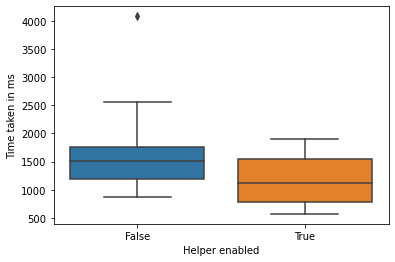

In [24]:
df_boxplot_st = df_pointing_exp[['helper_enabled', 'time_taken_in_ms']]
plot = sns.boxplot(
    data = df_boxplot_st,
    x = "helper_enabled",
    y = "time_taken_in_ms"
)
plot.set(xlabel = 'Helper enabled', ylabel = "Time taken in ms")

plt.show()

## T-Test - support technique

In [25]:
scipy.stats.ttest_ind(time_standard, time_helper)

Ttest_indResult(statistic=3.2988217443346532, pvalue=0.0014645582349780888)

## Boxplot - target shape

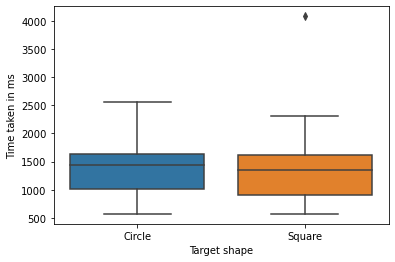

In [26]:
df_boxplot_ts = df_pointing_exp[['condition', 'time_taken_in_ms']]
plot = sns.boxplot(
    data = df_boxplot_ts,
    x = "condition",
    y = "time_taken_in_ms"
)
plot.set(xlabel = 'Target shape', ylabel = "Time taken in ms")

plt.show()

## T-Test - target shape

In [27]:
scipy.stats.ttest_ind(time_circle, time_square)

Ttest_indResult(statistic=-0.0955772540790127, pvalue=0.9241014595431047)

## Boxplot - participants

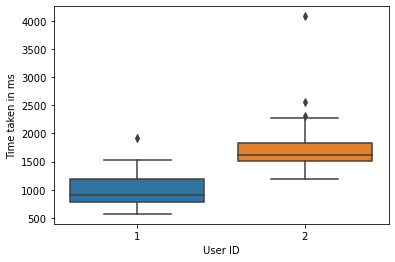

In [28]:
df_boxplot_p = df_pointing_exp[['user_id', 'time_taken_in_ms']]
plot = sns.boxplot(
    data = df_boxplot_p,
    x = "user_id",
    y = "time_taken_in_ms"
)
plot.set(xlabel = 'User ID', ylabel = "Time taken in ms")

plt.show()

## Discussion

The experiment was conducted on two different systems. Unfortunately, participant 2 had display problems during the experiment, which is why the average time for this participant was significantly higher than for participant (see "Boxplot - participants"). However, since this error occurred constantly in all runs, it is negligible for the following evaluations.

Hypotheses three and four on the accuracy of the pointing can be rejected, since the accuracies were 100 percent in all cases.

Hypothesis 1 can also be rejected. No significant difference could be found between circles (M = 1353.63, SD = 456.70, n = 40) and squares (M = 1365.35, SD = 615.10, n = 40), t = -0.10, p = 0.92.
 
Hypothesis 2, on the other hand, can be accepted, since a highly significant difference in time was found between performing the experiment with (M = 1169.93, SD = 426.98, n = 40) and without support (M = 1549.05, SD = 576.90, n =40), t = 3.30, p < 0.01. 